### Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Modeling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

#### Import the CSV Data as Pandas DataFrame

In [2]:
df=pd.read_csv('dataset/car_price_purchasing_v1.csv')

#### Show Top 5 Records

In [3]:
df.head()

,JobTitle,country,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit card debt,net worth,car purchase amount
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,Bulgaria,0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505,35321.45877
1,CAPTAIN III (POLICE DEPARTMENT),Belize,0,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078,45115.52566
2,CAPTAIN III (POLICE DEPARTMENT),Algeria,1,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773,42925.70921
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,Cook Islands,1,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524,67422.36313
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",Brazil,1,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671,55915.46248


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   JobTitle             500 non-null    object 
 1   country              500 non-null    object 
 2   gender               500 non-null    int64  
 3   age                  500 non-null    int64  
 4   BasePay              500 non-null    float64
 5   OvertimePay          500 non-null    float64
 6   OtherPay             500 non-null    float64
 7   TotalPay             500 non-null    float64
 8   TotalPayBenefits     500 non-null    float64
 9   credit card debt     500 non-null    float64
 10  net worth            500 non-null    float64
 11  car purchase amount  500 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 47.0+ KB


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['car purchase amount'],axis=1)

In [6]:
X.head()

,JobTitle,country,gender,age,BasePay,OvertimePay,OtherPay,TotalPay,TotalPayBenefits,credit card debt,net worth
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,Bulgaria,0,42,167411.18,0.00,400184.25,567595.43,567595.43,11609.380910,238961.2505
1,CAPTAIN III (POLICE DEPARTMENT),Belize,0,41,155966.02,245131.88,137811.38,538909.28,538909.28,9572.957136,530973.9078
2,CAPTAIN III (POLICE DEPARTMENT),Algeria,1,43,212739.13,106088.18,16452.60,335279.91,335279.91,11160.355060,638467.1773
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,Cook Islands,1,58,77916.00,56120.71,198306.90,332343.61,332343.61,14426.164850,548599.0524
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",Brazil,1,57,134401.60,9737.00,182234.59,326373.19,326373.19,5358.712177,560304.0671


In [7]:
y = df['car purchase amount']

In [8]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

#### seperate categorical and numerical feature

In [9]:
# create coloumn transformer with 3types of transformer
num_feature = X.select_dtypes(exclude='object').columns
cat_feature = X.select_dtypes(include='object').columns

In [ ]:
## remove the gender column it already encoded
num_feature = num_feature.drop('gender')

In [11]:
cat_feature,num_feature

(Index(['JobTitle', 'country'], dtype='object'),
 Index(['gender', 'age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
        'TotalPayBenefits', 'credit card debt', 'net worth'],
       dtype='object'))

In [12]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformaer = OrdinalEncoder()

preprocessor=ColumnTransformer(
    [('OrdinalEncoder',oh_transformaer,cat_feature),
     ('StandardScaler',numeric_transformer,num_feature)
    ],
    remainder='passthrough'
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(500, 11)

In [15]:
preprocessor.feature_names_in_

array(['JobTitle', 'country', 'gender', 'age', 'BasePay', 'OvertimePay',
       'OtherPay', 'TotalPay', 'TotalPayBenefits', 'credit card debt',
       'net worth'], dtype=object)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2=r2_score(true,predicted)
    return mae,mse,rmse,r2

In [18]:
models ={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regression":KNeighborsRegressor(),
    "Descision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list =[]
r2_list=[]

In [19]:
def compare_model(model_name,model):
    # model = models[i]
    model.fit(X_train,Y_train) #train model

    #make prediction
    y_train_pred =  model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #evaluate model
    model_train_mae,model_train_mse,model_train_rmse,model_train_r2 = evaluate_model(Y_train,y_train_pred)
    model_test_mae,model_test_mse,model_test_rmse,model_test_r2 = evaluate_model(Y_test,y_test_pred)

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean squared Error: {:.4f}".format(model_train_mse))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean squared Error: {:.4f}".format(model_test_mse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

In [20]:
compare_model("Linear Regression",models["Linear Regression"])

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 6709.1800
- Mean Absolute Error: 5361.6958
- Mean squared Error: 45013096.4890
- R2 Score: 0.6225
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6276.4875
- Mean Absolute Error: 5033.4782
- Mean squared Error: 39394295.9598
- R2 Score: 0.6308




In [21]:
compare_model("Lasso",models["Lasso"])

Lasso
Model performance for Training set
- Root Mean Squared Error: 6709.1807
- Mean Absolute Error: 5361.7253
- Mean squared Error: 45013105.0679
- R2 Score: 0.6225
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6276.4707
- Mean Absolute Error: 5033.4850
- Mean squared Error: 39394084.2240
- R2 Score: 0.6308




In [22]:
compare_model("Ridge",models["Ridge"])

Ridge
Model performance for Training set
- Root Mean Squared Error: 6709.2239
- Mean Absolute Error: 5361.1282
- Mean squared Error: 45013685.7485
- R2 Score: 0.6225
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6275.9176
- Mean Absolute Error: 5033.3647
- Mean squared Error: 39387141.1842
- R2 Score: 0.6309




In [23]:
compare_model("K-Neighbors Regression",models["K-Neighbors Regression"])

K-Neighbors Regression
Model performance for Training set
- Root Mean Squared Error: 9704.5514
- Mean Absolute Error: 7478.3561
- Mean squared Error: 94178317.2632
- R2 Score: 0.2101
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11026.0427
- Mean Absolute Error: 8676.7215
- Mean squared Error: 121573616.6200
- R2 Score: -0.1394




In [24]:
compare_model("Descision Tree",models["Descision Tree"])

Descision Tree
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- Mean squared Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 9492.0789
- Mean Absolute Error: 7766.8078
- Mean squared Error: 90099561.3891
- R2 Score: 0.1556




In [25]:
compare_model("XGBRegressor",models["XGBRegressor"])

XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 21.0113
- Mean Absolute Error: 14.7103
- Mean squared Error: 441.4734
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 7687.9306
- Mean Absolute Error: 6312.1569
- Mean squared Error: 59104277.5891
- R2 Score: 0.4461




In [26]:
compare_model("CatBoostRegressor",models["CatBoostRegressor"])

Learning rate set to 0.034685
0:	learn: 10781.0398577	total: 135ms	remaining: 2m 14s
1:	learn: 10642.5707943	total: 135ms	remaining: 1m 7s
2:	learn: 10471.7627484	total: 136ms	remaining: 45.3s
3:	learn: 10362.6423315	total: 137ms	remaining: 34.1s
4:	learn: 10225.6852983	total: 138ms	remaining: 27.4s
5:	learn: 10095.3250497	total: 139ms	remaining: 23s
6:	learn: 9967.1741650	total: 140ms	remaining: 19.8s
7:	learn: 9845.9208796	total: 141ms	remaining: 17.4s
8:	learn: 9750.5310063	total: 142ms	remaining: 15.6s
9:	learn: 9653.0736836	total: 143ms	remaining: 14.1s
10:	learn: 9545.9653188	total: 144ms	remaining: 12.9s
11:	learn: 9437.0991948	total: 145ms	remaining: 11.9s
12:	learn: 9343.8639485	total: 146ms	remaining: 11.1s
13:	learn: 9246.1186688	total: 147ms	remaining: 10.4s
14:	learn: 9142.5440674	total: 148ms	remaining: 9.71s
15:	learn: 9059.8726864	total: 149ms	remaining: 9.14s
16:	learn: 8981.5962698	total: 150ms	remaining: 8.65s
17:	learn: 8886.9197503	total: 151ms	remaining: 8.22s
18:

In [27]:
compare_model("AdaBoostRegressor",models["AdaBoostRegressor"])

AdaBoostRegressor
Model performance for Training set
- Root Mean Squared Error: 6032.4247
- Mean Absolute Error: 5136.0776
- Mean squared Error: 36390147.8167
- R2 Score: 0.6948
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6527.0191
- Mean Absolute Error: 5172.5905
- Mean squared Error: 42601978.5063
- R2 Score: 0.6007




In [28]:
r2_list,model_list

([0.6308078365616963,
  0.630809820889024,
  0.630874889088268,
  -0.1393534379393997,
  0.15561247678917967,
  0.44609148152121225,
  0.5828803961755249,
  0.6007463459286504],
 ['Linear Regression',
  'Lasso',
  'Ridge',
  'K-Neighbors Regression',
  'Descision Tree',
  'XGBRegressor',
  'CatBoostRegressor',
  'AdaBoostRegressor'])

#### Results

In [29]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
2,Ridge,0.630875
1,Lasso,0.630810
0,Linear Regression,0.630808
7,AdaBoostRegressor,0.600746
6,CatBoostRegressor,0.582880
5,XGBRegressor,0.446091
4,Descision Tree,0.155612
3,K-Neighbors Regression,-0.139353


## Linear Regression

In [30]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, Y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(Y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 63.08


## Plot y_pred and y_test

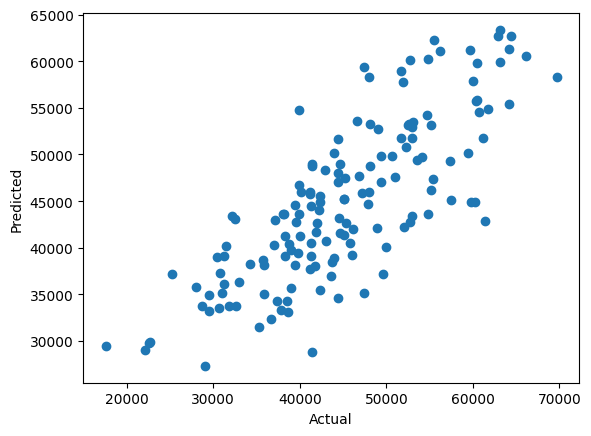

In [31]:
plt.scatter(Y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='car purchase amount'>

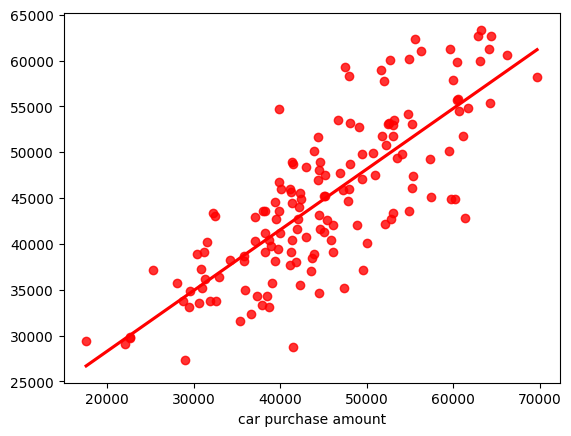

In [32]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='red')

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.metrics import mean_squared_error, r2_score

# 1. Basic Linear Regression with Feature Selection using RFE
def linear_regression_with_rfe(X_train, X_test, y_train, y_test, feature_names):
    # Initialize the model
    lr = LinearRegression()
    
    # Recursive Feature Elimination
    rfe = RFE(estimator=lr, n_features_to_select=None)
    rfe = rfe.fit(X_train, y_train)
    
    # Get selected features using feature names
    selected_features = np.array(feature_names)[rfe.support_]
    print("Selected Features:", selected_features)
    
    # Convert arrays back to DataFrames for feature selection
    X_train_df = pd.DataFrame(X_train, columns=feature_names)
    X_test_df = pd.DataFrame(X_test, columns=feature_names)
    
    # Train model with selected features
    X_train_selected = X_train_df[selected_features]
    X_test_selected = X_test_df[selected_features]
    
    lr.fit(X_train_selected, y_train)
    y_pred = lr.predict(X_test_selected)
    
    return lr, y_pred, selected_features



# 2. Lasso Regression with Hyperparameter Tuning
def lasso_regression_tuning(X_train, X_test, y_train, y_test,feature_names):
    # Define parameter grid
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [1000, 2000],
        'selection': ['cyclic', 'random']
    }
    
    # Initialize Lasso
    lasso = Lasso()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=lasso,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", np.sqrt(-grid_search.best_score_))
    
    # Predict using best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Feature importance
    feature_importance = pd.DataFrame({
        'feature': feature_names,
        'importance': np.abs(best_model.coef_)
    })
    print("\nFeature Importance:")
    print(feature_importance.sort_values(by='importance', ascending=False))
    
    return best_model, y_pred

# 3. Ridge Regression with Hyperparameter Tuning
def ridge_regression_tuning(X_train, X_test, y_train, y_test):
    # Define parameter grid
    param_grid = {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
    }
    
    # Initialize Ridge
    ridge = Ridge()
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(
        estimator=ridge,
        param_grid=param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", np.sqrt(-grid_search.best_score_))
    
    # Predict using best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    
    return best_model, y_pred

# 4. Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"\n{model_name} Results:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

# 5. Main execution
def run_all_models(X_train, X_test, y_train, y_test,feature_names):
    # Linear Regression with RFE
    print("\n=== Linear Regression with RFE ===")
    lr_model, lr_pred, selected_features = linear_regression_with_rfe(X_train, X_test, y_train, y_test,feature_names)
    evaluate_model(y_test, lr_pred, "Linear Regression with RFE")
    
    # Lasso Regression
    print("\n=== Lasso Regression ===")
    lasso_model, lasso_pred = lasso_regression_tuning(X_train, X_test, y_train, y_test,feature_names)
    evaluate_model(y_test, lasso_pred, "Lasso Regression")
    
    # Ridge Regression
    print("\n=== Ridge Regression ===")
    ridge_model, ridge_pred = ridge_regression_tuning(X_train, X_test, y_train, y_test)
    evaluate_model(y_test, ridge_pred, "Ridge Regression")

feature_names = preprocessor.feature_names_in_.tolist()
# Run all models
run_all_models(X_train, X_test, Y_train, Y_test,feature_names)



=== Linear Regression with RFE ===
Selected Features: ['age' 'BasePay' 'OtherPay' 'credit card debt' 'net worth']

Linear Regression with RFE Results:
RMSE: 6194.6704
R2 Score: 0.6404

=== Lasso Regression ===
Best parameters: {'alpha': 100, 'max_iter': 1000, 'selection': 'random'}
Best score: 6886.1225329106055

Feature Importance:
             feature   importance
3                age  6513.385807
10         net worth  5189.722029
9   credit card debt   515.012322
6           OtherPay    92.348637
7           TotalPay    27.259669
0           JobTitle    24.148285
1            country     0.371417
2             gender     0.000000
4            BasePay     0.000000
5        OvertimePay     0.000000
8   TotalPayBenefits     0.000000

Lasso Regression Results:
RMSE: 6278.3775
R2 Score: 0.6306

=== Ridge Regression ===
Best parameters: {'alpha': 1, 'solver': 'sag'}
Best score: 6916.751033758851

Ridge Regression Results:
RMSE: 6274.7656
R2 Score: 0.6310


#### === Ridge Regression ===

- Best parameters: {'alpha': 1, 'solver': 'sag'}
- Best score: 6917.224422905401

### Ridge Regression Results:
- RMSE: 6283.7014
- R2 Score: 0.6300


### Feature Importance:

|index      | Feature   | Importance|
| ---       | ---       |  --       |
|3  |              age | 6513.385807|
|10 |        net worth | 5189.722029|
|9  | credit card debt |  515.012322|
|6  |         OtherPay |   92.348637|
|7  |         TotalPay |   27.259669|
|0  |         JobTitle |   24.148285|
|1  |          country |    0.371417|
|2  |           gender |    0.000000|
|4  |          BasePay |    0.000000|
|5  |      OvertimePay |    0.000000|
|8  | TotalPayBenefits |    0.000000|

In [ ]:
import os
os.getcwd()
import os,sys
from pathlib import Path

# Get the absolute path of the project root directory
ROOT = Path(os.getcwd()).parent

In [64]:
from src.utils import save_object

In [ ]:
# save the preprocessor object
save_object(str(ROOT)+'/artifact/preprocessor.pkl',preprocessor)

In [68]:
lr_model, lr_pred, selected_features = linear_regression_with_rfe(X_train, X_test, Y_train,Y_test,feature_names)

# Lasso Regression
lasso_model, lasso_pred = lasso_regression_tuning(X_train, X_test, Y_train, Y_test,feature_names)

# Ridge Regression
ridge_model, ridge_pred = ridge_regression_tuning(X_train, X_test, Y_train, Y_test)

Selected Features: ['age' 'BasePay' 'OtherPay' 'credit card debt' 'net worth']
Best parameters: {'alpha': 100, 'max_iter': 1000, 'selection': 'random'}
Best score: 6885.989835480926

Feature Importance:
             feature   importance
3                age  6513.399792
10         net worth  5189.779274
9   credit card debt   514.848450
6           OtherPay    92.594425
7           TotalPay    26.730704
0           JobTitle    24.101071
1            country     0.370570
8   TotalPayBenefits     0.028495
2             gender     0.000000
4            BasePay     0.000000
5        OvertimePay     0.000000
Best parameters: {'alpha': 1, 'solver': 'sag'}
Best score: 6916.601657717737


In [ ]:
#build the ensemble classifier 
from sklearn.ensemble import VotingRegressor

# Create the voting regressor
voting_regressor = VotingRegressor([
        ('lr', lr_model),
        ('lasso', lasso_model),
        ('ridge', ridge_model)
    ])
voting_regressor.fit(X_train, Y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('lasso', Lasso(alpha=100, selection='random')),
                            ('ridge', Ridge(alpha=1, solver='sag'))])

In [71]:
y_pred = voting_regressor.predict(X_test)

In [72]:
r2_score(Y_test,y_pred)

0.6309888710740311

In [ ]:
#save the model
save_object(str(ROOT)+'/artifact/model.pkl',voting_regressor)